### Dependence of the emittance growth rate (due to noise kicks) on the tune spread -v2

-  Load the pickle files which include the emittance growth rates for different ayy values. The filea are created from the emittance_growth_rate_vs_tune_spread_000.ipynb script.
- The different sets correspond to different fixed lists of random kicks.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Plotting parameters

In [142]:
params = {'legend.fontsize': 20,
          'figure.figsize': (10.5, 9.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 3,
          'lines.markersize': 8,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Load the data

In [158]:
n_sets = 4
type_of_noise = 'AN'

In [159]:
# dictionaries for the data of each "set"
ey_rate = {} # dey/dt (nm/s)
ayy_pyheadtail = {} # ayy in pyheadtail units
ayy_usual = {} # ayy (1/m)

for my_set in range(n_sets):
    temp_dict = pickle.load(open('./input/growth_rates_{}_set{}.pkl'.format(type_of_noise, my_set+1), 'rb'))
    ey_rate['set_{}'.format(my_set)] = temp_dict['dey/dt (nm/s)']
    ayy_pyheadtail['set_{}'.format(my_set)] = temp_dict['ayy (PyHEADTAIL units)']
    ayy_usual['set_{}'.format(my_set)] = temp_dict['ayy (1/m)']

### Plotting part

1) Define the plotting parameters (color and expected growth) depending on the type of noise.

2) Plot all the sets in the same figure

    - a) without the expected rate and/or the nominal SPS noise level
    - b) with the expected rate and/or the nominal SPS noise level
 
3) Plot the average of the sets and the variance over the different sets (using fill between).

In [160]:
# define axis limits - same for both type of noise
xlim_low, xlim_up = -3.8*1e4, 0.1*1e4
ylim_low, ylim_up = 14, 25

In [161]:
if type_of_noise == 'PN':
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
    expected_growth = 24 # nm/s, expected rate from analytical calculations 
    c = np.arange(1, n_sets + 3) # +3 to get better colors
    norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
    cmap.set_array([])
else:
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
    expected_growth = 22 # nm/s, expected rate from analytical calculations 
    c = np.arange(1, n_sets + 3)
    norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Oranges)
    cmap.set_array([])

#### Plot all the sets in the same figure

#### Α) All the different sets in the same plot, ayy in pyheadtail units

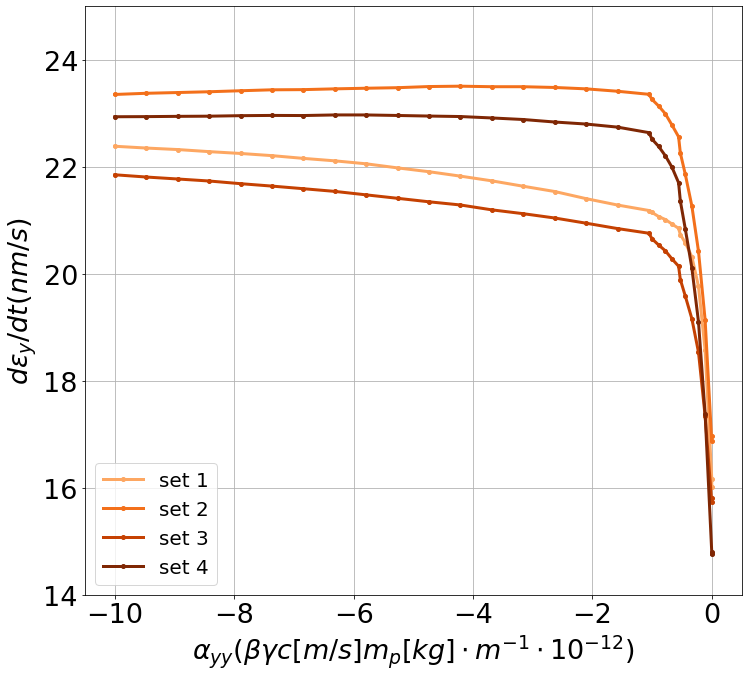

In [162]:
for my_set in range(n_sets):
    plt.plot(np.array(ayy_pyheadtail['set_{}'.format(my_set)])*1e12, np.array(ey_rate['set_{}'.format(my_set)])*1e9, '.-', c=cmap.to_rgba(my_set + 3), label='set {}'.format(my_set+1))

    
plt.xlabel(r'$\alpha_{yy} (\beta \gamma c [m/s] m_p [kg] \cdot m^{-1} \cdot 10^{-12}) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')

plt.ylim(ylim_low, ylim_up)

plt.legend(loc=3)
plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('emittance_grwoth_vs_ayy_pyheadtailunits{}_{}sets_v1.png'.format(type_of_noise, n_sets))

#### B) All the different sets in the same plotm ayy in 1/m

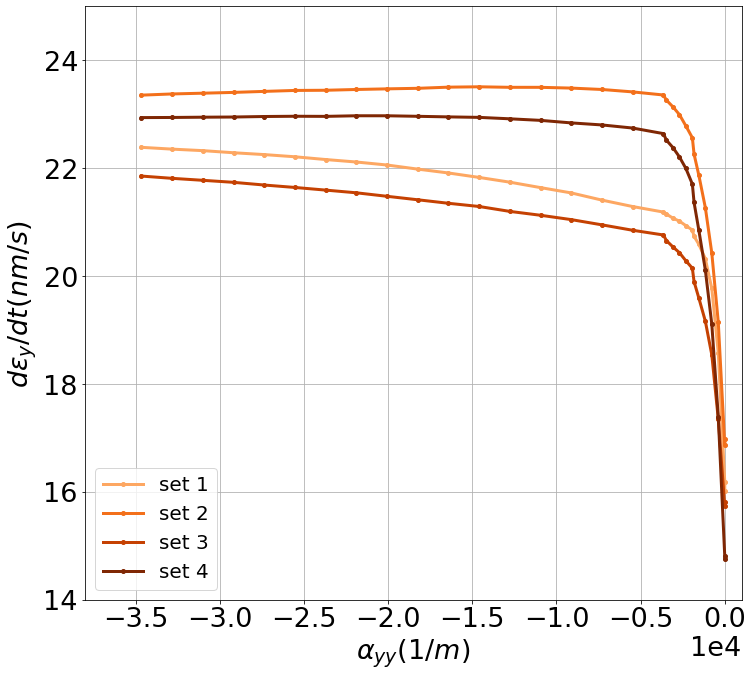

In [163]:
for my_set in range(n_sets):
    plt.plot(ayy_usual['set_{}'.format(my_set)], np.array(ey_rate['set_{}'.format(my_set)])*1e9, '.-', c=cmap.to_rgba(my_set + 3), label='set {}'.format(my_set+1))

plt.ticklabel_format(axis="x", style="sci",  scilimits=(0,0))
plt.xlabel(r'$\alpha_{yy} (1/m) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')
plt.legend(loc=3)
plt.ylim(ylim_low, ylim_up)
plt.xlim(xlim_low, xlim_up)
plt.xlim()
plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('emittance_grwoth_vs_ayy_usualunits{}_{}sets_v1.png'.format(type_of_noise, n_sets))

### Compute the average of the different sets and the variance 

In [164]:
ey_rate_mean = []
ey_rate_std = []

ayy_list_len = len(ayy_usual['set_0'])

for ayy_index in range(ayy_list_len):
    temp_ey_rate = []
    for my_set in range(n_sets):
        temp_ey_rate.append(ey_rate['set_{}'.format(my_set)][ayy_index])
    ey_rate_mean.append(np.mean(temp_ey_rate))
    ey_rate_std.append(np.std(temp_ey_rate))

#### C) Plot the averege and the variance over the different sets, ayy in PyHEADTAIL units

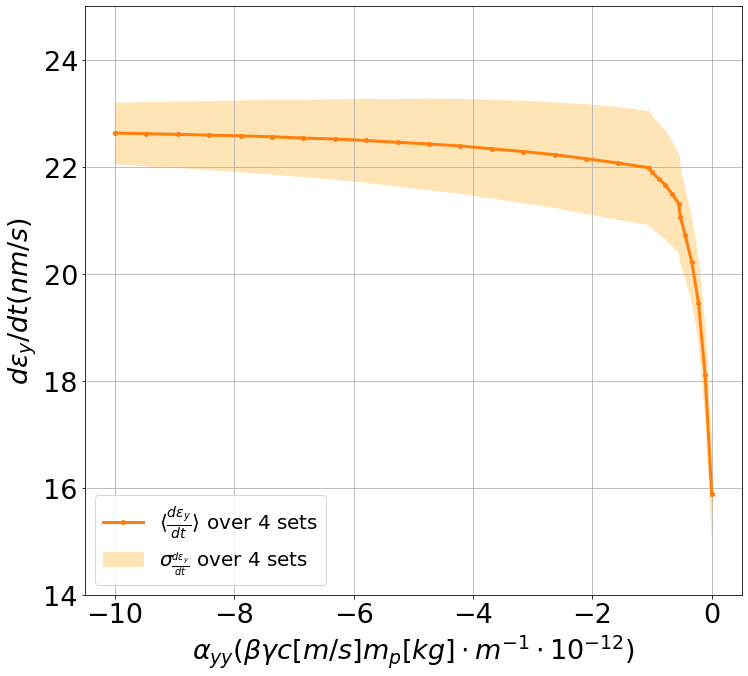

In [165]:
my_x_values = np.array(ayy_pyheadtail['set_0'])*1e12

plt.plot(my_x_values, np.array(ey_rate_mean)*1e9, '.-', c=my_color, label=r'$\langle \frac{d\epsilon_y}{dt}\rangle $'+' over {} sets'.format(n_sets))
plt.fill_between(my_x_values, np.array(ey_rate_mean)*1e9 - np.array(ey_rate_std)*1e9, np.array(ey_rate_mean)*1e9 + np.array(ey_rate_std)*1e9, color=fill_bewtween_color, label=r'$\sigma_{\frac{d\epsilon_y}{dt}} $'+' over {} sets'.format(n_sets))
    
    
plt.xlabel(r'$\alpha_{yy} (\beta \gamma c [m/s] m_p [kg] \cdot m^{-1} \cdot 10^{-12}) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')
plt.ylim(ylim_low, ylim_up)
plt.legend(loc=3)
plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('emittance_grwoth_vs_ayy_pyheadtailunits{}_{}sets_fill_bewtween.png'.format(type_of_noise, n_sets))

In [166]:
# The ayy coefficient of the nominal SPS lattice in MAD-X
app_y = -30.78659311
p0 = 1.4431339682235239e-16 # reference momentum
app_y_pyheadtail = app_y*(p0*2) # convert to pyheadtail units
print(app_y_pyheadtail)

-8.88583565658346e-15


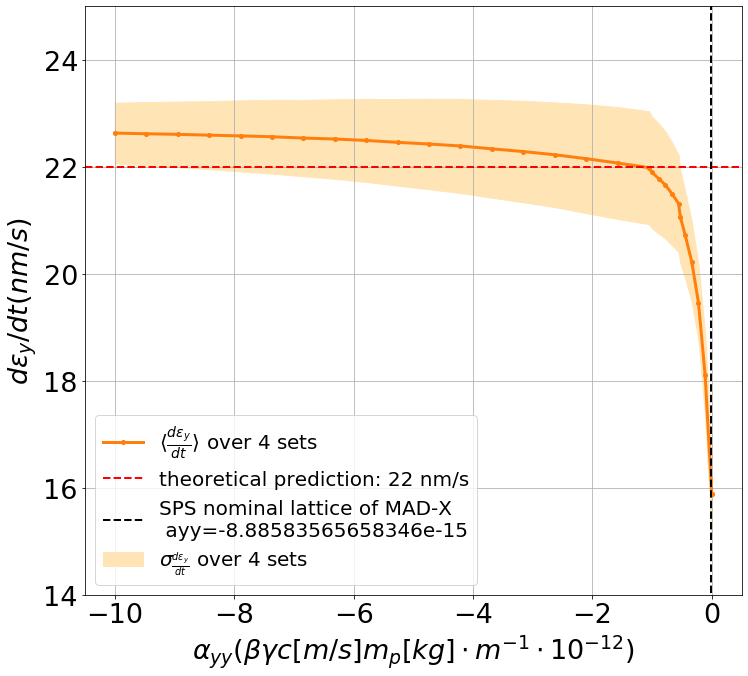

In [167]:
my_x_values = np.array(ayy_pyheadtail['set_0'])*1e12

plt.plot(my_x_values, np.array(ey_rate_mean)*1e9, '.-', c=my_color, label=r'$\langle \frac{d\epsilon_y}{dt}\rangle $'+' over {} sets'.format(n_sets))
plt.fill_between(my_x_values, np.array(ey_rate_mean)*1e9 - np.array(ey_rate_std)*1e9, np.array(ey_rate_mean)*1e9 + np.array(ey_rate_std)*1e9, color=fill_bewtween_color, label=r'$\sigma_{\frac{d\epsilon_y}{dt}} $'+' over {} sets'.format(n_sets))
plt.axhline(y=expected_growth, c = 'r', linewidth = 2, linestyle='--', label= 'theoretical prediction: {} nm/s'.format(expected_growth))
plt.axvline(x=app_y_pyheadtail*1e12, ymin=0.003, c='k', linewidth=2, linestyle='--', label='SPS nominal lattice of MAD-X \n ayy={}'.format(app_y_pyheadtail))

    
plt.xlabel(r'$\alpha_{yy} (\beta \gamma c [m/s] m_p [kg] \cdot m^{-1} \cdot 10^{-12}) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')
plt.ylim(ylim_low, ylim_up)
plt.legend(loc=3)
plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('emittance_grwoth_vs_ayy_pyheadtailunits{}_{}sets_fill_between_v2.png'.format(type_of_noise, n_sets))

#### D) Plot the averege and the variance over the different sets, ayy in (1/m)

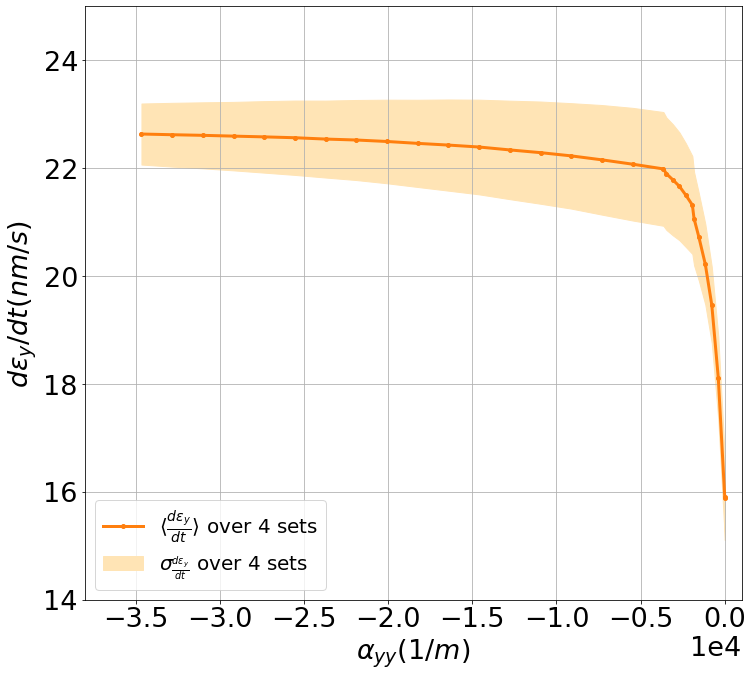

In [168]:
my_x_values = ayy_usual['set_0']

plt.plot(my_x_values, np.array(ey_rate_mean)*1e9, '.-', c=my_color, label=r'$\langle \frac{d\epsilon_y}{dt}\rangle $'+' over {} sets'.format(n_sets))
plt.fill_between(my_x_values, np.array(ey_rate_mean)*1e9 - np.array(ey_rate_std)*1e9, np.array(ey_rate_mean)*1e9 + np.array(ey_rate_std)*1e9, color=fill_bewtween_color, label=r'$\sigma_{\frac{d\epsilon_y}{dt}} $'+' over {} sets'.format(n_sets))

plt.ticklabel_format(axis="x", style="sci",  scilimits=(0,0))
plt.xlabel(r'$\alpha_{yy} (1/m) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')
plt.ylim(ylim_low, ylim_up)
plt.xlim(xlim_low, xlim_up)
plt.legend(loc=3)
plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('emittance_grwoth_vs_ayy_usualunits{}_{}sets_fill_between.png'.format(type_of_noise, n_sets))

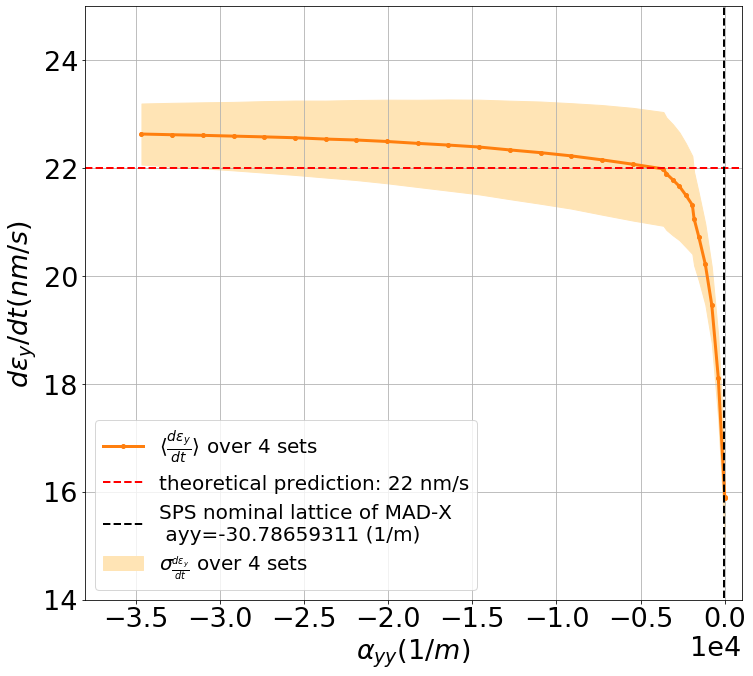

In [169]:
my_x_values = ayy_usual['set_0']

plt.plot(my_x_values, np.array(ey_rate_mean)*1e9, '.-', c=my_color, label=r'$\langle \frac{d\epsilon_y}{dt}\rangle $'+' over {} sets'.format(n_sets))
plt.fill_between(my_x_values, np.array(ey_rate_mean)*1e9 - np.array(ey_rate_std)*1e9, np.array(ey_rate_mean)*1e9 + np.array(ey_rate_std)*1e9, color=fill_bewtween_color, label=r'$\sigma_{\frac{d\epsilon_y}{dt}} $'+' over {} sets'.format(n_sets))
plt.axhline(y=expected_growth, c = 'r', linewidth = 2, linestyle='--', label= 'theoretical prediction: {} nm/s'.format(expected_growth))

plt.axvline(x=app_y, ymin=0.003, c='k', linewidth=2, linestyle='--', label='SPS nominal lattice of MAD-X \n ayy={} (1/m)'.format(app_y))

plt.ticklabel_format(axis="x", style="sci",  scilimits=(0,0))
plt.xlabel(r'$\alpha_{yy} (1/m) $')
plt.ylabel(r'$d\epsilon_y / dt (nm/s) $')
plt.xlim(xlim_low, xlim_up)
plt.ylim(ylim_low, ylim_up)
plt.legend(loc=3)
plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('emittance_grwoth_vs_ayy_usualunits{}_{}sets_fill_between_v2.png'.format(type_of_noise, n_sets))

### Add secondary axis with the corresponding tune spread

In [170]:
DQy_list = pickle.load(open('./input/DQy_vs_ayy_analytical_appx6.243e-14_apxy0.0_final.pkl', 'rb'))

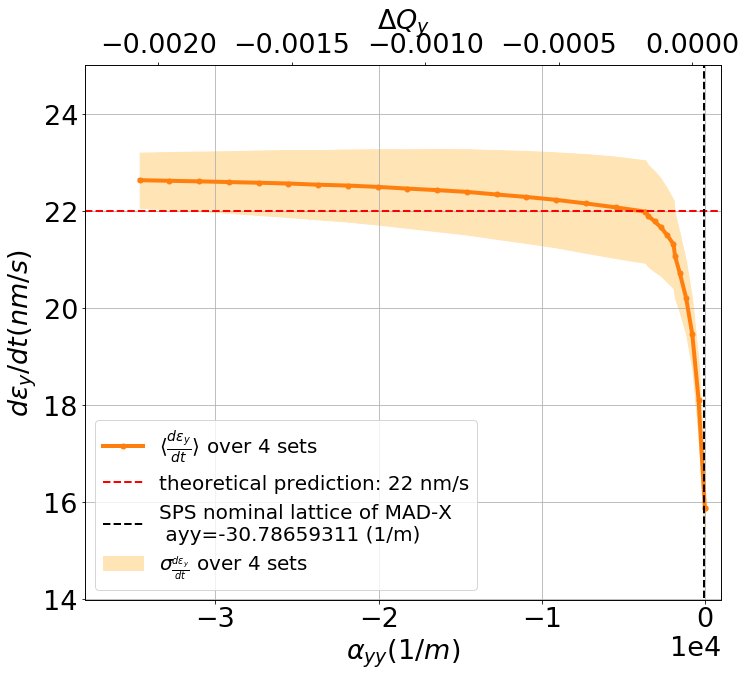

In [171]:
fig, ax1 = plt.subplots()
my_x_values = ayy_usual['set_0']

ax1.plot(my_x_values, np.array(ey_rate_mean)*1e9, '.-', linewidth=4, ms=10, c=my_color, label=r'$\langle \frac{d\epsilon_y}{dt}\rangle $'+' over {} sets'.format(n_sets))
ax1.fill_between(my_x_values, np.array(ey_rate_mean)*1e9 - np.array(ey_rate_std)*1e9, np.array(ey_rate_mean)*1e9 + np.array(ey_rate_std)*1e9, color=fill_bewtween_color, label=r'$\sigma_{\frac{d\epsilon_y}{dt}} $'+' over {} sets'.format(n_sets))
ax1.axhline(y=expected_growth, c = 'r', linewidth = 2, linestyle='--', label= 'theoretical prediction: {} nm/s'.format(expected_growth))

ax1.axvline(x=app_y, ymin=0.003, c='k', linewidth=2, linestyle='--', label='SPS nominal lattice of MAD-X \n ayy={} (1/m)'.format(app_y))

ax1.set_xlim(xlim_low, xlim_up)
ax1.set_ylim(ylim_low, ylim_up)
ax1.ticklabel_format(axis="x", style="sci",  scilimits=(0,0))
ax1.set_xlabel(r'$\alpha_{yy} (1/m) $')
ax1.set_ylabel(r'$d\epsilon_y / dt (nm/s) $')
ax1.grid()
ax1.legend(loc=3)

ax2 = ax1.twiny() 
ax2.plot(np.array(DQy_list['DQy']), np.zeros(len(ey_rate_mean)), '', c = 'g',label=r'$\Delta Q_y$')
ax2.set_xlabel(r'$\Delta Q_y $')
#ax2.grid()
#ax2.ticklabel_format(axis="x", style="sci",  scilimits=(0,0))

#plt.figlegend(loc=6)
#plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('emittance_grwoth_vs_ayy_usualunits{}_{}sets_fill_between_tune_spread.png'.format(type_of_noise, n_sets))

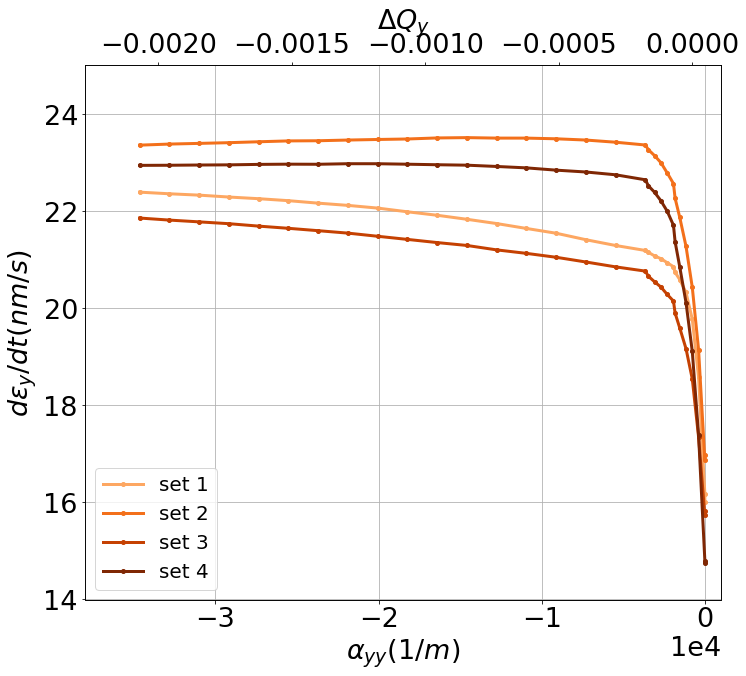

In [172]:
fig, ax1 = plt.subplots()
my_x_values = ayy_usual['set_0']

for my_set in range(n_sets):
    plt.plot(ayy_usual['set_{}'.format(my_set)], np.array(ey_rate['set_{}'.format(my_set)])*1e9, '.-', c=cmap.to_rgba(my_set + 3), label='set {}'.format(my_set+1))


ax1.set_xlim(xlim_low, xlim_up)
ax1.set_ylim(ylim_low, ylim_up)
ax1.ticklabel_format(axis="x", style="sci",  scilimits=(0,0))
ax1.ticklabel_format(axis="x", style="sci",  scilimits=(0,0))
ax1.set_xlabel(r'$\alpha_{yy} (1/m) $')
ax1.set_ylabel(r'$d\epsilon_y / dt (nm/s) $')
plt.legend(loc=3)
ax1.grid()
ax1.legend(loc=3)

ax2 = ax1.twiny() 
ax2.plot(np.array(DQy_list['DQy']), np.zeros(len(ey_rate_mean)), '', c = 'g',label=r'$\Delta Q_y$')
ax2.set_xlabel(r'$\Delta Q_y $')
#ax2.grid()
#ax2.ticklabel_format(axis="x", style="sci",  scilimits=(0,0))

#plt.figlegend(loc=6)
#plt.grid()
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig('emittance_grwoth_vs_ayy_usualunits{}_{}sets_tune_spread.png'.format(type_of_noise, n_sets))